In [11]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import gc

In [12]:
# assign dtypes to minimize memory usage
dtypes = {
    'Id': 'object',
    'groupId': 'object',
    'matchId': 'object',
    'assists': 'uint8',
    'boosts': 'uint8',
    'damageDealt': 'float16',
    'DBNOs': 'uint8',
    'headshotKills': 'uint8',
    'heals': 'uint8',
    'killPlace': 'uint8',
    'killPoints': 'uint16',
    'kills': 'uint8',
    'killStreaks': 'uint8',
    'longestKill': 'float16',
    'maxPlace': 'uint8',
    'numGroups': 'uint8',
    'revives': 'uint8',
    'rideDistance': 'float16',
    'roadKills': 'uint8',
    'swimDistance': 'float16',
    'teamKills': 'uint8',
    'vehicleDestroys': 'uint8',
    'walkDistance': 'float16',
    'weaponsAcquired': 'uint8',
    'winPoints': 'uint8',
    'winPlacePerc': 'float16'
}

## Check for nan values in datasets

In [13]:
train_data = pd.read_csv("train_V2.csv", dtype=dtypes)
test_data = pd.read_csv("test_V2.csv", dtype=dtypes)

print(train_data.loc[:, train_data.isnull().any()].columns)
print(test_data.loc[:, test_data.isnull().any()].columns)

train_data[train_data['winPlacePerc'].isnull()]
train_data = train_data.dropna(subset=['winPlacePerc'])
train_data[train_data['winPlacePerc'].isnull()]

Index(['winPlacePerc'], dtype='object')
Index([], dtype='object')


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In training set found one column, where was nan values and that was column 'winPlacePerc'. In 'winPlacePerc' was only one row with nan value, so i removed it.

# Linear Regression

In [14]:
train_data_copy = train_data.copy()
# Remove column with string values
train_data_copy.drop(['Id','groupId','matchId', 'matchType'],axis=1,inplace=True)

X=train_data_copy.drop(['winPlacePerc'],axis=1) 
y=train_data_copy['winPlacePerc']

In [15]:
# Split the training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Reduce size to save time
X_train, X_test, y_train, y_test = X_train[:100000], X_test[:100000], y_train[:100000], y_test[:100000]

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X_train[:100000], y_train[:100000])

LinearRegression()

In [17]:
predictions = linear_regression.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.0161494746243561

In [18]:
-cross_val_score(linear_regression,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.01629515, 0.01599398, 0.01619653])

# Linear Regression Parameters Tuning

In [19]:
params={'fit_intercept':[True,False],'normalize':[True,False]}

In [20]:
grid_search= GridSearchCV(linear_regression,params,cv=3,scoring='neg_mean_squared_error')

In [21]:
grid_search.fit(X,y)
grid_search.best_params_

{'fit_intercept': True, 'normalize': True}

In [22]:
linear_regression_tuned = LinearRegression(fit_intercept = True, normalize = True, n_jobs = -1)
linear_regression_tuned.fit(X_train, y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [23]:
predictions = linear_regression_tuned.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.016149474624356095

In [24]:
-cross_val_score(linear_regression_tuned,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.01629515, 0.01599398, 0.01619653])

In [25]:
gc.collect()

128

## Lasso

In [26]:
train_data_copy = train_data.copy()
# Remove column with string values
train_data_copy.drop(['Id','groupId','matchId', 'matchType'],axis=1,inplace=True)

X=train_data_copy.drop(['winPlacePerc'],axis=1) 
y=train_data_copy['winPlacePerc']

In [27]:
# Split the training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Reduce size to save time
X_train, X_test, y_train, y_test = X_train[:100000], X_test[:100000], y_train[:100000], y_test[:100000]

In [28]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [29]:
predictions = lasso.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.02423157370223815

In [30]:
-cross_val_score(lasso,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.02414965, 0.02393773, 0.02418077])

## Lasso Parameters Tuning

In [31]:
params={'alpha':[1,0.1,0.001,0.0001], 'normalize':[True,False], 'max_iter':[1000,2500,5000]}

In [32]:
grid_search= GridSearchCV(lasso,params,cv=3,scoring='neg_mean_squared_error')

In [33]:
grid_search.fit(X,y)
grid_search.best_params_

C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1033731080089808, tolerance: 0.006330832704113601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22020186200279213, tolerance: 0.0063291763240868725
  model = cd_fast.enet_coordinate_descent(
C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.052921486579213806, tolerance: 0.006452457414654024
  model = cd_fast.enet_coordinate_descent(
C:\Users\Maasikas\miniconda3\envs\IDS\lib\site-package

{'alpha': 0.001, 'max_iter': 1000, 'normalize': False}

In [34]:
lasso_tuned = Lasso(fit_intercept = True, normalize = False, alpha = 0.0001, max_iter = 2500)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=2500)

In [35]:
predictions = lasso_tuned.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.01607091183866451

In [36]:
-cross_val_score(lasso_tuned,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.01616045, 0.01615448, 0.01617987])

In [37]:
gc.collect()

128

# Ridge

In [38]:
train_data_copy = train_data.copy()
# Remove column with string values
train_data_copy.drop(['Id','groupId','matchId', 'matchType'],axis=1,inplace=True)

X=train_data_copy.drop(['winPlacePerc'],axis=1) 
y=train_data_copy['winPlacePerc']

In [39]:
# Split the training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Reduce size to save time
X_train, X_test, y_train, y_test = X_train[:100000], X_test[:100000], y_train[:100000], y_test[:100000]

In [40]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [41]:
predictions = ridge.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.016212650721463474

In [42]:
-cross_val_score(ridge,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.01624234, 0.01598889, 0.01618214])

# Ridge Parameters Tuning

In [43]:
params={'alpha':[1,0.1,0.001,0.0001], 'normalize':[True,False], 'tol':[0.1,0.01, 0.001]}

In [44]:
grid_search= GridSearchCV(ridge,params,cv=3,scoring='neg_mean_squared_error')

In [45]:
grid_search.fit(X,y)
grid_search.best_params_

{'alpha': 1, 'normalize': False, 'tol': 0.1}

In [46]:
ridge_tuned = Ridge(fit_intercept = True, normalize = False, alpha = 1, tol =  0.001, solver = 'auto')
ridge_tuned.fit(X_train, y_train)

Ridge(alpha=1)

In [47]:
predictions = ridge_tuned.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.016212650721463474

In [48]:
-cross_val_score(ridge_tuned,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.01624234, 0.01598889, 0.01618214])

In [49]:
gc.collect()

152

# Random Forest Regressor

In [50]:
train_data_copy = train_data.copy()
# Remove column with string values
train_data_copy.drop(['Id','groupId','matchId', 'matchType'],axis=1,inplace=True)

X=train_data_copy.drop(['winPlacePerc'],axis=1) 
y=train_data_copy['winPlacePerc']

In [51]:
# Split the training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Reduce size to save time
X_train, X_test, y_train, y_test = X_train[:100000], X_test[:100000], y_train[:100000], y_test[:100000]

In [52]:
randomForest = RandomForestRegressor()
randomForest.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
predictions = randomForest.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.008025195051970177

In [54]:
-cross_val_score(randomForest,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.00823506, 0.00811013, 0.00831612])

# Random Forest Regressor Parameters Tuning

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 0.5, 'auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['sqrt', 0.5, 'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [1, 17, 34, 50, 67, 83,
                                                         100, 116, 133, 150]},
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 133,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 0.5,
 'max_depth': 50,
 'bootstrap': False}

In [81]:
randomForest_tuned = RandomForestRegressor(n_estimators=150, max_features='auto', min_samples_leaf=3, n_jobs=-1,verbose=2)
randomForest_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s


building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   34.0s finished


RandomForestRegressor(min_samples_leaf=3, n_estimators=150, n_jobs=-1,
                      verbose=2)

In [82]:
predictions = randomForest_tuned.predict(X_test)
mean_squared_error(y_test.values,predictions)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    1.1s finished


0.00788740086957618

In [83]:
-cross_val_score(randomForest_tuned,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   23.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]:

array([0.00825921, 0.00797688, 0.00810921])

In [84]:
gc.collect()

1659

# LightGBM

In [66]:
train_data_copy = train_data.copy()
# Remove column with string values
train_data_copy.drop(['Id','groupId','matchId', 'matchType'],axis=1,inplace=True)

X=train_data_copy.drop(['winPlacePerc'],axis=1) 
y=train_data_copy['winPlacePerc']

In [67]:
# Split the training data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Reduce size to save time
X_train, X_test, y_train, y_test = X_train[:100000], X_test[:100000], y_train[:100000], y_test[:100000]

In [68]:
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [85]:
predictions = lgbm.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.007416863923239789

In [86]:
-cross_val_score(lgbm,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.00763185, 0.00740135, 0.00741496])

# LightGBM Parameters Tuning
## Based on recommendations in https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [69]:
# Create the random grid
random_grid = {'boosting_type':['gbdt', 'dart', 'goss', 'rf'],
    'num_leaves':[10, 30, 50],
    'max_depth':[-1, 30, 50],
    'learning_rate':[0.1, 0.01, 1, 0.3],
    'n_estimators':[50, 100, 150],
    'reg_alpha':[0.0, 0.1, 0.01, 0.001]}

In [72]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
light_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
light_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.7s finished


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart',
                                                          'goss', 'rf'],
                                        'learning_rate': [0.1, 0.01, 1, 0.3],
                                        'max_depth': [-1, 30, 50],
                                        'n_estimators': [50, 100, 150],
                                        'num_leaves': [10, 30, 50],
                                        'reg_alpha': [0.0, 0.1, 0.01, 0.001]},
                   verbose=2)

In [73]:
light_random.best_params_

{'reg_alpha': 0.001,
 'num_leaves': 30,
 'n_estimators': 150,
 'max_depth': 30,
 'learning_rate': 0.1,
 'boosting_type': 'gbdt'}

In [78]:
lgbm_tuned = lightgbm.LGBMRegressor(learning_rate = 0.03,objective = "regression",metric = "mae",num_leaves =  128,verbose =  1,bagging_fraction =  0.7,feature_fraction =  0.7, n_estimators=150)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.7, feature_fraction=0.7, learning_rate=0.03,
              metric='mae', n_estimators=150, num_leaves=128,
              objective='regression', verbose=1)

In [79]:
predictions = lgbm_tuned.predict(X_test)
mean_squared_error(y_test.values,predictions)

0.007396678964326167

In [80]:
-cross_val_score(lgbm_tuned,X_train,y_train,cv=3,scoring='neg_mean_squared_error')

array([0.00758329, 0.00735876, 0.00742744])

## Graphs

In [7]:
results = [0.016149, 0.016149, 0.024231, 0.016071, 0.016213, 0.016212, 0.008025,0.0078874, 0.0074168, 0.0073966]
labels = ["Linear Regression(B)", "Linear Regression(A)", "Lasso(B)", "Lasso(A)", "Ridge(B)", "Ridge(A)",  "Random Forest Regressor(B)", "Random Forest Regressor(A)", "LightGBM(B)", "LightGBM(A)"]

Text(0.5, 0, 'Model')

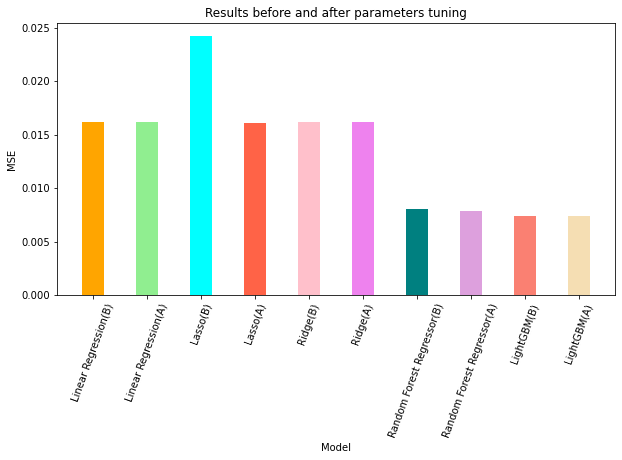

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10, 5)) 
plt.bar(labels, results, width = 0.4, color = ["orange","lightgreen","cyan","tomato", "pink", "violet", "teal", "plum", "salmon", "wheat"])
plt.xticks(rotation=70)
plt.title("Results before and after parameters tuning")
plt.ylabel('MSE')
plt.xlabel('Model')